# DFBA
This section describes how to run dynamic FBA (DFBA) with `sbmlutils`.

In [1]:
from __future__ import absolute_import, print_function
import os

from sbmlutils import dfba
from sbmlutils.dfba import utils

## Toy example

/usr/local/lib/python2.7/dist-packages/optlang/gurobi_interface.py:26: UserWarning: Be careful! The GUROBI interface is still under construction ...
  warn("Be careful! The GUROBI interface is still under construction ...")


Create directory: /tmp/tmpAtw1dD/v5
Flattened model written to /tmp/tmpAtw1dD/v5/toy_flattened.xml
/tmp/tmpAtw1dD/v5/toy_fba.xml
/tmp/tmpAtw1dD/v5/toy_bounds.xml
/tmp/tmpAtw1dD/v5/toy_update.xml
/tmp/tmpAtw1dD/v5/toy_top.xml
/tmp/tmpAtw1dD/v5/toy_flattened.xml
/tmp/tmpAtw1dD/v5/toy_top.xml

Simulation time: 0.238333940506



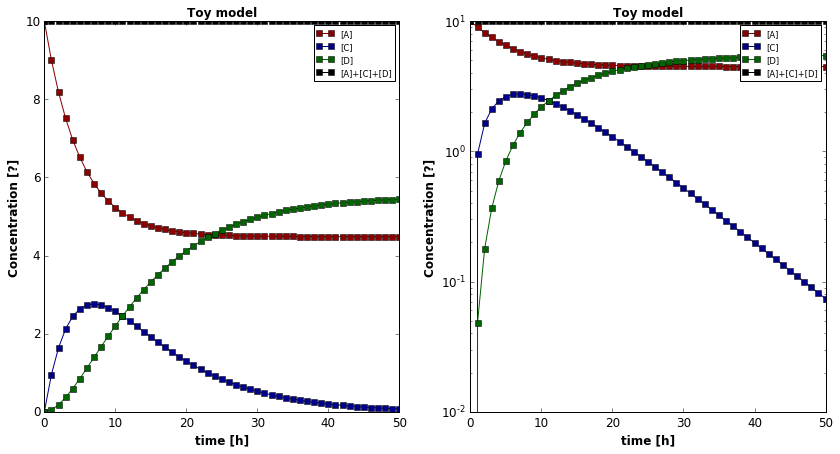

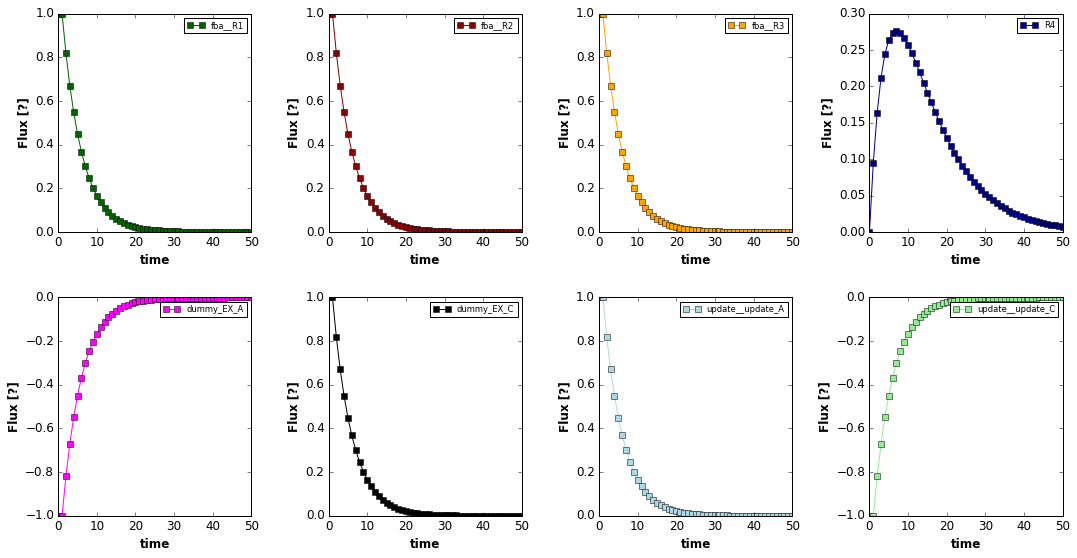

     time        [A]       [C]       [D]  [dummy_S]  [fba__A]  [fba__B1]  \
0.0   0.0  10.000000  0.000000  0.000000        0.0       0.0        0.0   
1.0   1.0   9.000000  0.951626  0.048374        0.0       0.0        0.0   
2.0   2.0   8.181269  1.640192  0.178539        0.0       0.0        0.0   
3.0   3.0   7.510949  2.122001  0.367049        0.0       0.0        0.0   
4.0   4.0   6.962138  2.442333  0.595529        0.0       0.0        0.0   

     [fba__B2]  [fba__C]        R4    ...     bounds__lb_default   dt  \
0.0        0.0       0.0  0.000000    ...                -1000.0  0.1   
1.0        0.0       0.0  0.095163    ...                -1000.0  0.1   
2.0        0.0       0.0  0.164019    ...                -1000.0  0.1   
3.0        0.0       0.0  0.212200    ...                -1000.0  0.1   
4.0        0.0       0.0  0.244233    ...                -1000.0  0.1   

     fba__ub_default  fba__zero  k_R4     lb_EX_A    lb_EX_C  ub_EX_A  \
0.0           1000.0        0.0

In [2]:
from sbmlutils.dfba.toy import toysettings
from sbmlutils.dfba.toy import model_factory as toyfactory
from sbmlutils.dfba.toy import simulate as toysimulate

import tempfile
test_dir = tempfile.mkdtemp()

# create the toy model
toyfactory.create_model(test_dir)
# here the files are generated
sbml_path = os.path.join(utils.versioned_directory(test_dir, toyfactory.version),
                         toysettings.top_file)
print(sbml_path)
# simulate
dfs = toysimulate.simulate_toy(sbml_path, test_dir, dts=[1.0], figures=False)

toysimulate.print_species(dfs=dfs)
toysimulate.print_fluxes(dfs=dfs)
print(dfs[0].head())

## Diauxic growth

/tmp/tmpKhlsEn/v9/diauxic_bounds.xml
valid                    : <TRUE>
validation error(s)      : 0
validation warnings(s)   : 17
check time (ms)          : 0.033452
--------------------------------------------------------------------------------


Create directory: /tmp/tmpKhlsEn/v9
E0: SBML unit consistency (core, L241, code)  
------------------------------------------------------------
[Warning] The units of the function call's arguments are not consistent with its definition
The units of the expressions used as arguments to a function call are expected to match the units expected for the arguments of that function. 
Reference: L3V1 Section 3.4
 The formula 'piecewise(lb_default, gt(lb_default, -Ac / X * bioreactor / dt), -Ac / X * bioreactor / dt)' in the math element of the <assignmentRule> uses a piecewise function where different branches return different units.


E1: SBML unit consistency (core, L241, code)  
------------------------------------------------------------
[Warning] The units of the function call's arguments are not consistent with its definition
The units of the expressions used as arguments to a function call are expected to match the units expected for the arguments of that function. 
Reference: L3V1 Sect

/tmp/tmpKhlsEn/v9/diauxic_top.xml
valid                    : <TRUE>
validation error(s)      : 0
validation warnings(s)   : 9
check time (ms)          : 0.335422
--------------------------------------------------------------------------------


E0: SBML component consistency (comp, L1, code)  
------------------------------------------------------------
[Warning] Line numbers unreliable.
Due to the need to instantiate models, modelDefinitions, submodels etc. for the purposes of validation it is problematic to reliably report line numbers when performing validation on models using the Hierarchical Model Composition package.


E1: SBML unit consistency (core, L241, code)  
------------------------------------------------------------
[Warning] The units of the function call's arguments are not consistent with its definition
The units of the expressions used as arguments to a function call are expected to match the units expected for the arguments of that function. 
Reference: L3V1 Section 3.4
 The formula 'piecewise(bounds__lb_default, gt(bounds__lb_default, -Ac / X * bioreactor / dt), -Ac / X * bioreactor / dt)' in the math element of the <assignmentRule> uses a piecewise function where different branches return different units

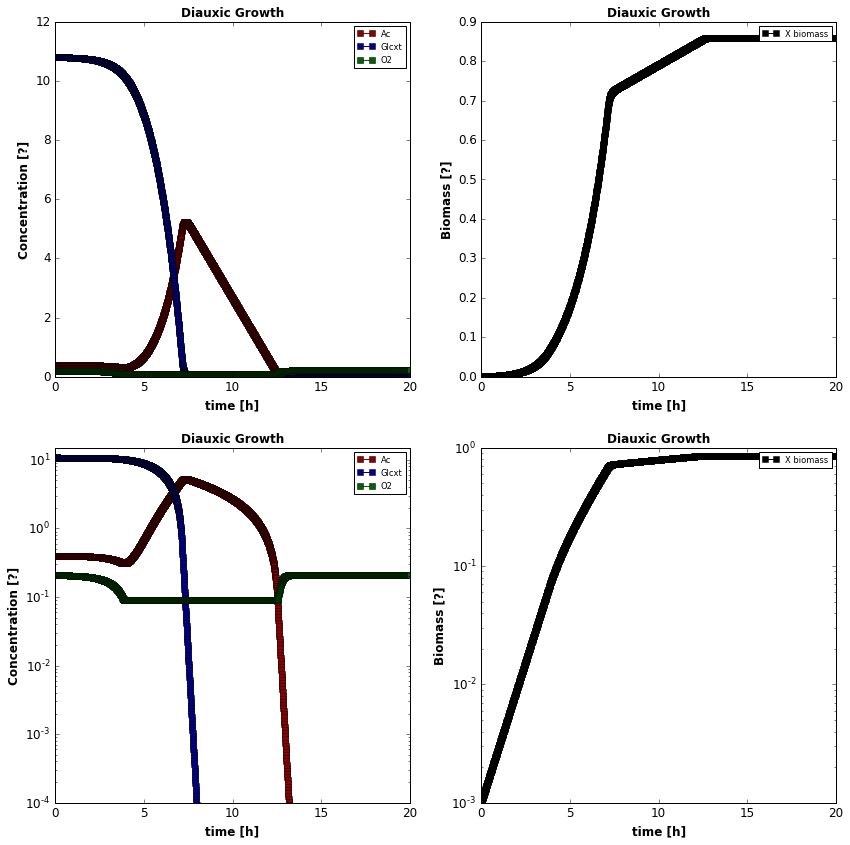

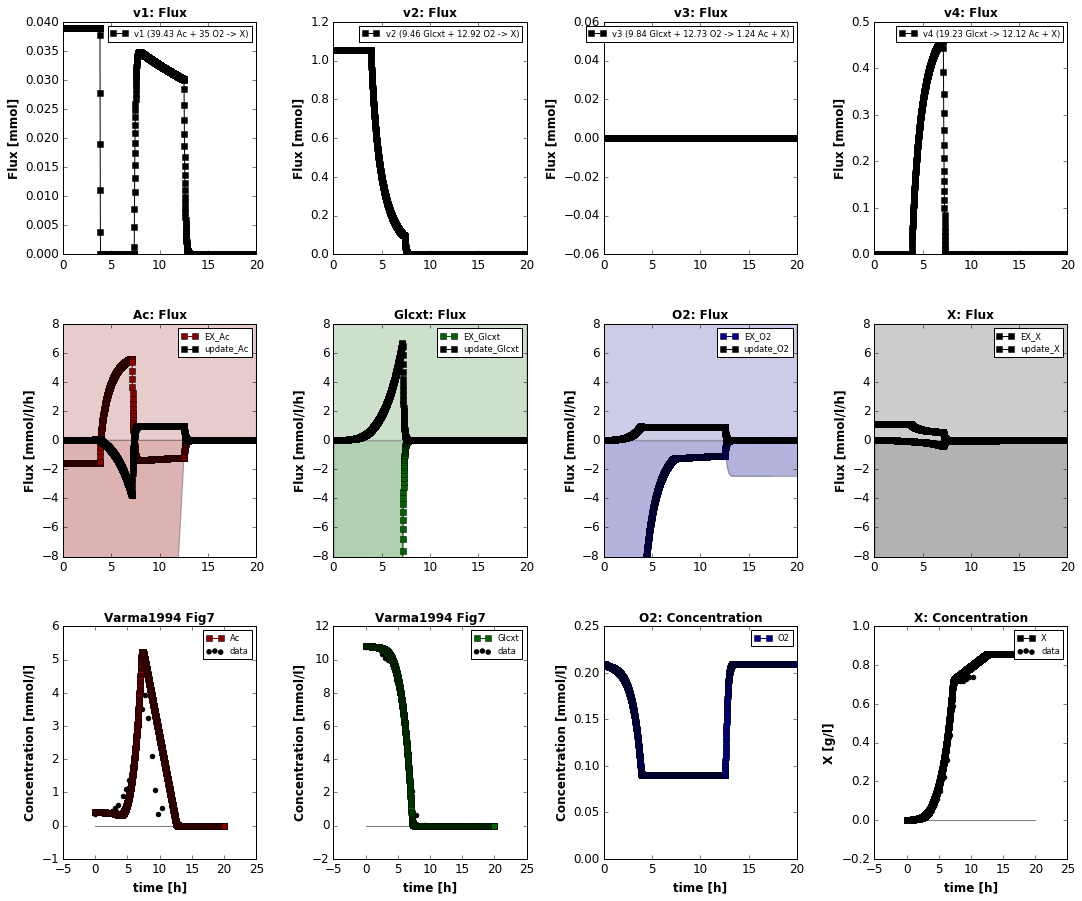

      time      [Ac]    [Glcxt]      [O2]       [X]  [dummy_S]  [fba__Ac]  \
0.00  0.00  0.400000  10.800000  0.210000  0.001000        0.0        0.4   
0.01  0.01  0.399985  10.799900  0.209855  0.001011        0.0        0.4   
0.02  0.02  0.399969  10.799798  0.209719  0.001022        0.0        0.4   
0.03  0.03  0.399953  10.799695  0.209591  0.001033        0.0        0.4   
0.04  0.04  0.399937  10.799592  0.209470  0.001045        0.0        0.4   

      [fba__Glcxt]  [fba__O2]  [fba__X]   ...     fba__zero  kLa  lb_EX_Ac  \
0.00          10.8       0.21     0.001   ...           0.0  7.5   -1000.0   
0.01          10.8       0.21     0.001   ...           0.0  7.5   -1000.0   
0.02          10.8       0.21     0.001   ...           0.0  7.5   -1000.0   
0.03          10.8       0.21     0.001   ...           0.0  7.5   -1000.0   
0.04          10.8       0.21     0.001   ...           0.0  7.5   -1000.0   

      lb_EX_Glcxt  lb_EX_O2  lb_EX_X  ub_EX_Ac  ub_EX_Glcxt  ub_EX_O

In [3]:
from sbmlutils.dfba.diauxic_growth import dgsettings
from sbmlutils.dfba.diauxic_growth import model_factory as dgfactory
from sbmlutils.dfba.diauxic_growth import simulate as dgsimulate
from sbmlutils.dfba.diauxic_growth import analyse as dganalyse

import tempfile
test_dir = tempfile.mkdtemp()

# create the model
dgfactory.create_model(test_dir)

# top model file
sbml_path = os.path.join(utils.versioned_directory(test_dir, dgfactory.version),
                         dgsettings.top_file)
print(sbml_path)

# run DFBA
dfs = dgsimulate.simulate_diauxic_growth(sbml_path, test_dir, dts=[0.01], figures=False)

# plot results
dganalyse.print_species(dfs=dfs)
dganalyse.print_fluxes(dfs=dfs)
print(dfs[0].head())